In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_df = pd.read_csv('../data_banknote_authentication.csv')
df = original_df.copy()
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
X = df.drop('Class',axis=1)
y = df['Class']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [5]:
scores = []
for i in range(64,200,10):
    random_forest = RandomForestClassifier(n_estimators=i,max_features=2,bootstrap=True,oob_score=True)
    random_forest.fit(X_train,y_train)
    y_pred = random_forest.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    scores.append(score)
scores  

[0.9975728155339806,
 0.9975728155339806,
 0.9951456310679612,
 0.9951456310679612,
 0.9975728155339806,
 0.9951456310679612,
 0.9951456310679612,
 0.9951456310679612,
 0.9975728155339806,
 0.9951456310679612,
 0.9951456310679612,
 0.9975728155339806,
 0.9927184466019418,
 0.9951456310679612]

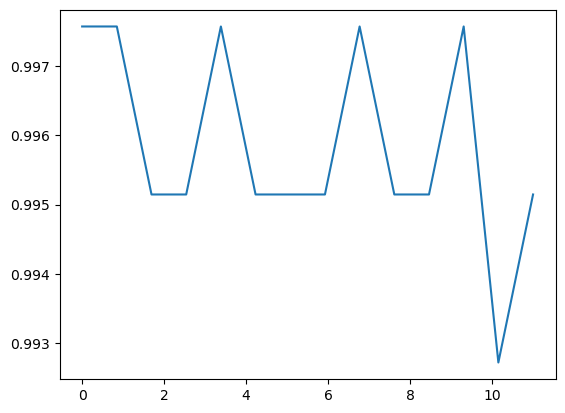

In [6]:
x = np.linspace(0,11,14)
plt.plot(x,scores)
plt.show()